#Research Proposal & Experiment Plan: Capital Bikeshare Data between 2011 and 2012 in Washington D.C

Patty Boonlue  
Thinkful Bootcamp Data Science Program  
May 2019  

##About the Data

The bike share data is from 2011 and 2012 from Capital Bikeshare system operating in Washington D.C., USA. Dataset includes several information relating to bike trips, including date, season, year, month, hour, day of the week, weather, wind speed, and temperature. 

Bike-sharing rental process is highly dependent on environmental and season settings, such as precipitation, weather conditions, and hour of the day, etc. The information extracted from the dataset as well as through an experiment can assist bike share operators to provide 


The bike sharing dataset is accessible on Kaggle at https://www.kaggle.com/c/bike-sharing-demand/overview and also on UC Irvine's Machine Learning Repository at http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#.

###Data Characteristics

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df=pd.read_csv("Bike_data_day.csv")

df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


##Getting to know the data...

Examining trends in the data to determine what type of experimentation would be appropriate. 

<div class="alert alert-block alert-info">
Bike usage, in this case, is defined as the casual and the registered users combined. The 'cnt' column represent this value.
</div>

###Bike Usage per Month


In [4]:
#Aggregating the number of bike rides per month for both year 2011 (represented by yr =0) and year 2012 (represented by yr=1)
df.groupby('mnth', as_index=False).agg({'cnt': 'sum'})


,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


In [5]:
#Breaking down the data even further by month and year
df_2=df.groupby(['mnth','yr'], as_index=False).agg({'cnt': 'sum'})

In [6]:
df_2.head(24)

,mnth,yr,cnt
0,1,0,38189
1,1,1,96744
2,2,0,48215
3,2,1,103137
4,3,0,64045
5,3,1,164875
6,4,0,94870
7,4,1,174224
8,5,0,135821
9,5,1,195865


In [8]:
#Bike usage per month for year 2011 (yr==0)
df_3=df_2[df_2.yr==0]

df_3

,mnth,yr,cnt
0,1,0,38189
2,2,0,48215
4,3,0,64045
6,4,0,94870
8,5,0,135821
10,6,0,143512
12,7,0,141341
14,8,0,136691
16,9,0,127418
18,10,0,123511


In [10]:
#Bike usage per month for year 2012 (yr==1)
df_4=df_2[df_2.yr==1]

df_4

,mnth,yr,cnt
1,1,1,96744
3,2,1,103137
5,3,1,164875
7,4,1,174224
9,5,1,195865
11,6,1,202830
13,7,1,203607
15,8,1,214503
17,9,1,218573
19,10,1,198841


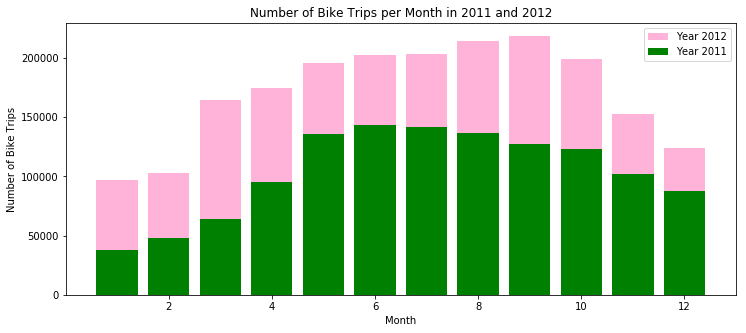

In [39]:
#Graphing the bike usage by month for both years
plt.figure(figsize=(12,5))

plt.bar(df_4['mnth'],df_4['cnt'], color='hotpink',alpha=.5, label='Year 2012')
plt.bar(df_3['mnth'],df_3['cnt'], color='green', label='Year 2011')
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips')
plt.title('Number of Bike Trips per Month in 2011 and 2012')
plt.legend(loc='upper right')


Trends:
     - Bike usage increased throughout the warmer months (April through September)
     - January has the lowest number of trips for both years
     - Bike usage for 2012 is greater than bike usage for 2011 for every month

###Bike Usage by Weather Situation

In [44]:
#Breaking down the bike usage by different weather situations. Please refer to data
#characteristics above for the numbers corresponding to weather situations.

df_5=df.groupby(['weathersit'], as_index=False).agg({'cnt': 'sum'})

df_5

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


Text(0.5, 1.0, 'Number of Bike Trips Under Various Weather Situations')

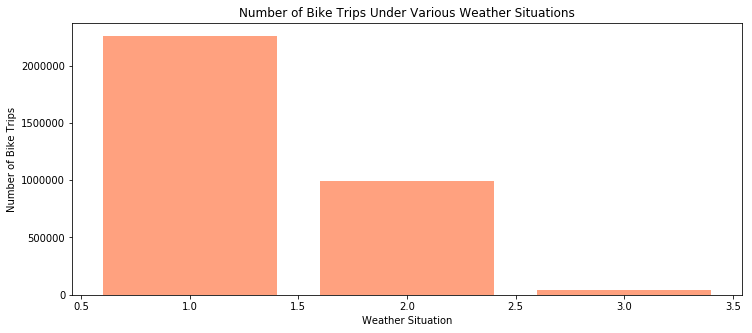

In [48]:
#Plotting the number of trips by weather situations
plt.figure(figsize=(12,5))

plt.bar(df_5['weathersit'],df_5['cnt'], color='orangered',alpha=.5)
plt.xlabel('Weather Situation')
plt.ylabel('Number of Bike Trips')
plt.title('Number of Bike Trips Under Various Weather Situations')


Trends: 1) Bike usage is significantly higher under weather situation 1, which includes clear, few clouds, and partly cloudy and 2) Bike usage is lowest under weather situation 3, which includes light snow, light rain with thunderstorm and scattered clouds, and light rain with scattered clouds.

###Bike Usage by Temperature 

Text(0.5, 1.0, 'Normalized Temperature in Celsius vs. Number of Bike Trips')

<Figure size 864x360 with 0 Axes>

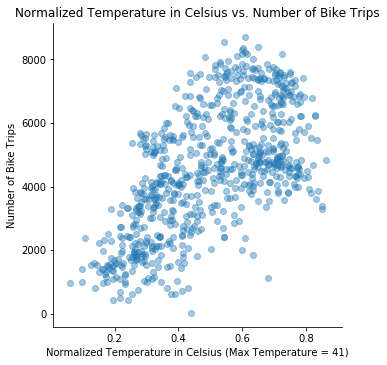

In [65]:
#Plotting number of bike trips vs. temperature
plt.figure(figsize=(12,5))

sns.lmplot(x='temp',y='cnt', data=df,fit_reg=False, scatter_kws={'alpha':0.4}, palette='muted')
plt.xlabel('Normalized Temperature in Celsius (Max Temperature = 41)')
plt.ylabel('Number of Bike Trips')
plt.title('Normalized Temperature in Celsius vs. Number of Bike Trips')

Trend: Bike usage seems to increase with increasing temperature until about 0.75 (about high 80s), then declines again

##Proposing a Research Regarding Bike Share in Washington, D.C

Hypothesis: Bike ridership has a positive correlation with warmer weather and months. 

Experiment Question: How to increase bike ridership when weather is not as warm and in the early Spring and late Fall months? 

Rollout Plan: From the visualizations of the data set, we can see how weather heavily influences the number of bike trips in Washington, D.C. The warmer Summer and Fall months saw higher riderships than the Winter months. This trend is even more promiment when bike trips are broken down in terms of the various weather conditions that that occurred during the bike trips (in Graph #2). 

The bike company is trying to figure out ways to increase bike ridership when the weather is a little bit cooler than the ideal temperature for bike riding, but still comfortable enough to bike. The company decides to send e-mails and text messages to individuals that previously rented a bike with the company on days that are expected to have an average temperature between 55 F to 70 F to offer a 20% discount on bike rates regardless of month for the next one year. The year after that, the scenario will be the same but with a 10% discount to the users instead of the 20%. 

Evaluation Plan: The existing data set will be the baseline for this experiment. Bike usage will be monitored for the next two years to see whether the discount has any effect on the bike usage and whether 20% or 10% is more appropriate of a discount to the users. Since the bike ridership seems to be increasing for 2011 and 2012, the company would have to normalize their data set so that the trends in bike usage can be observed for a total of four years without any bias. What constitute success is when normalized ridership has increased 20% to 30% in the years with the discounts implemented. 

##Next Steps and Other Possible Experiments

Another important factor in the longitivity of the company relies on converting the casual users to registered users. Although bike ridership is increasing, it's crucial that the company monitors their customer retention rate. The experiement would first look at the current ratio between casual and registered users as well as the number of both categories over the two years of operation. The rollout plan can also include periodic discounts or membership discounts to casual customers to see the rate that they would convert to registered. 